In [108]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

from statsmodels.tsa import arima_model

from sklearn import preprocessing, neighbors, grid_search, cross_validation
from sklearn import metrics

%matplotlib inline
plt.style.use('ggplot')

In [109]:
df = pd.read_csv(os.path.join('energy_production_final.csv'))


In [135]:
df

,Biomass,Coal,Crude Oil,Geothermal,Hydroelectric,Natgas (dry production),Nuclear,Solar,Wind,GDP
Year,,,,,,,,,,
1984-01-01,2.971120,19.719216,18.848237,0.080811,3.385811,18.007933,3.552531,0.000055,0.000068,7.400000e+12
1985-01-01,3.016233,19.325166,18.992407,0.097421,2.970192,16.980380,4.075563,0.000111,0.000060,7.710000e+12
1986-01-01,2.932095,19.509466,18.375862,0.107677,3.071179,16.540801,4.380109,0.000147,0.000044,7.940000e+12
1987-01-01,2.874884,20.141104,17.674787,0.112270,2.634508,17.135819,4.753933,0.000109,0.000037,8.290000e+12
1988-01-01,3.016049,20.737639,17.278931,0.106338,2.334265,17.598597,5.586968,0.000094,0.000009,8.610000e+12
...,...,...,...,...,...,...,...,...,...,...
2011-01-01,4.501348,22.221407,11.952314,0.212311,3.102852,23.405720,8.268698,0.105285,1.167636,1.520000e+13
2012-01-01,4.405757,20.676893,13.769991,0.211592,2.628702,24.610065,8.061822,0.148110,1.340059,1.540000e+13
2013-01-01,4.646919,20.001304,15.808860,0.214006,2.562382,24.859072,8.244433,0.212775,1.601359,1.580000e+13


In [111]:
df.dropna(inplace = True)

df.isnull().sum().sum()

0

After dropping null values, the time series analysis will begin in the year 1984 to the present. Some energy sources did not have historical data before 1984. knn analysis might be conducted to predict what these values might have been if necessary.


In [112]:
df

,Year,Biomass,Coal,Crude Oil,Geothermal,...,Natgas (dry production),Nuclear,Solar,Wind,GDP
35,1984,2.971120,19.719216,18.848237,0.080811,...,18.007933,3.552531,0.000055,0.000068,7.400000e+12
36,1985,3.016233,19.325166,18.992407,0.097421,...,16.980380,4.075563,0.000111,0.000060,7.710000e+12
37,1986,2.932095,19.509466,18.375862,0.107677,...,16.540801,4.380109,0.000147,0.000044,7.940000e+12
38,1987,2.874884,20.141104,17.674787,0.112270,...,17.135819,4.753933,0.000109,0.000037,8.290000e+12
39,1988,3.016049,20.737639,17.278931,0.106338,...,17.598597,5.586968,0.000094,0.000009,8.610000e+12
...,...,...,...,...,...,...,...,...,...,...,...
62,2011,4.501348,22.221407,11.952314,0.212311,...,23.405720,8.268698,0.105285,1.167636,1.520000e+13
63,2012,4.405757,20.676893,13.769991,0.211592,...,24.610065,8.061822,0.148110,1.340059,1.540000e+13
64,2013,4.646919,20.001304,15.808860,0.214006,...,24.859072,8.244433,0.212775,1.601359,1.580000e+13
65,2014,4.848900,20.285705,18.552425,0.214490,...,26.718073,8.337559,0.321174,1.727542,1.620000e+13


In [113]:
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')
df.set_index('Year', drop=True, inplace=True)
df.columns = [col.strip() for col in df.columns]
df.head()

,Biomass,Coal,Crude Oil,Geothermal,Hydroelectric,Natgas (dry production),Nuclear,Solar,Wind,GDP
Year,,,,,,,,,,
1984-01-01,2.971120,19.719216,18.848237,0.080811,3.385811,18.007933,3.552531,0.000055,0.000068,7.400000e+12
1985-01-01,3.016233,19.325166,18.992407,0.097421,2.970192,16.980380,4.075563,0.000111,0.000060,7.710000e+12
1986-01-01,2.932095,19.509466,18.375862,0.107677,3.071179,16.540801,4.380109,0.000147,0.000044,7.940000e+12
1987-01-01,2.874884,20.141104,17.674787,0.112270,2.634508,17.135819,4.753933,0.000109,0.000037,8.290000e+12
1988-01-01,3.016049,20.737639,17.278931,0.106338,2.334265,17.598597,5.586968,0.000094,0.000009,8.610000e+12


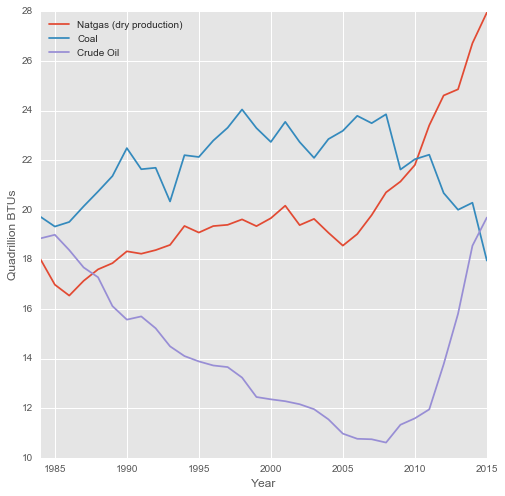

In [114]:
ax = df[['Natgas (dry production)', 'Coal', 'Crude Oil']].plot(label = 'Series', 
                                                                                           figsize = (8,8))
ax.set_ylabel('Quadrillion BTUs')

train_df = df.sample(frac = .6, random_state = 0).sort_index()

'Biomass', 'Coal', 'Crude Oil', 'Geothermal', 'Hydroelectric', 'Natgas (dry production)', 'Nuclear', 'Solar', 'Wind'

In [158]:

train_X = train_df.drop('GDP', axis = 1)

 
train_y = train_df.GDP

#arima_model.ARIMA(train_df['global tmp'],order= , exog=train_df.drop['globaltmp'])


In [159]:
model = arima_model.ARIMA(train_y, (1, 0, 0), train_X).fit()

In [160]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                    GDP   No. Observations:                   24
Model:                     ARMA(1, 0)   Log Likelihood                -662.772
Method:                       css-mle   S.D. of innovations   238248681729.066
Date:                Sun, 13 Nov 2016   AIC                           1349.545
Time:                        20:22:28   BIC                           1363.682
Sample:                    01-01-1984   HQIC                          1353.295
                         - 01-01-2007                                         
===========================================================================================
                              coef    std err          z      P>|z|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------------
const                    2.363e+13   7.33e+12      3.224      0.007      9.26e+12   3.8e+13
Biomass                 -2.412e+11        nan        nan        nan           nan       nan
Coal                     5.769e+10   8.41e+10      0.686      0.505     -1.07e+11  2.23e+11
Crude Oil               -1.024e+12   1.53e+11     -6.713      0.000     -1.32e+12 -7.25e+11
Geothermal               2.641e+12   9.18e+12      0.288      0.778     -1.54e+13  2.06e+13
Hydroelectric            2.951e+11        nan        nan        nan           nan       nan
Natgas (dry production)   8.33e+10   1.58e+11      0.528      0.606     -2.26e+11  3.92e+11
Nuclear                  1.591e+10   2.46e+11      0.065      0.949     -4.66e+11  4.98e+11
Solar                     -3.7e+13   7.84e+12     -4.722      0.000     -5.24e+13 -2.16e+13
Wind                     3.541e+12   1.31e+12      2.712      0.018      9.82e+11   6.1e+12
ar.L1.GDP                  -0.0017        nan        nan        nan           nan       nan
                                    Roots                                    
=============================================================================
                 Real           Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1         -602.0911           +0.0000j          602.0911            0.5000
-----------------------------------------------------------------------------
"""

ValueError: You must provide exog for ARMAX

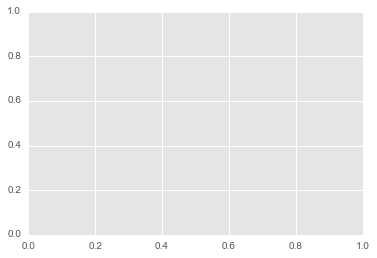

In [161]:
model.plot_predict(20, 40)

exog=train_df.drop("GDP")

train_df["GDP"]

test_hat_df = model.predict(
    test_df.index[0].strftime('%Y-%m-%d'),
    test_df.index[-1].strftime('%Y-%m-%d'),
    dynamic = True
)

print 'Mean absolute error =', metrics.mean_absolute_error(test_df, test_hat_df)

model.summary


n = df.shape[0]
m = int(.75 * n)

train_df = df[: m]
test_df = df[m :]

In [150]:
train_df.columns

Index([u'Biomass', u'Coal', u'Crude Oil', u'Geothermal', u'Hydroelectric',
       u'Natgas (dry production)', u'Nuclear', u'Solar', u'Wind', u'GDP'],
      dtype='object')